In [12]:
import subprocess, re
import numpy as np
import matplotlib.pyplot as plt

def run(exe):
    out = subprocess.check_output([exe], text=True)
    print(out)
    return out

out_far = run("./build/tests/faraday/test-faraday")
out_amp = run("./build/tests/ampere/test-ampere")
out_mom = run("./build/tests/moments/test-moments")


Testing Faraday's law implementation in 1D...

i=1	B.y = 0.00998334	Expected: 0.00998334	Error: 1.73472e-18
	i=1	B.z = 0.000499583	Expected: 0.000499583	Error: 0
i=2	B.y = 0.00988359	Expected: 0.00988359	Error: 1.73472e-18
	i=2	B.z = 0.00149376	Expected: 0.00149376	Error: 0
i=3	B.y = 0.00968509	Expected: 0.00968509	Error: 0
	i=3	B.z = 0.00247301	Expected: 0.00247301	Error: 0
i=4	B.y = 0.00938981	Expected: 0.00938981	Error: 0
	i=4	B.z = 0.00342755	Expected: 0.00342755	Error: 0
i=5	B.y = 0.00900072	Expected: 0.00900072	Error: 1.04083e-17
	i=5	B.z = 0.00434784	Expected: 0.00434784	Error: 1.04083e-17
i=6	B.y = 0.00852169	Expected: 0.00852169	Error: 1.73472e-18
	i=6	B.z = 0.00522469	Expected: 0.00522469	Error: 8.67362e-19
i=7	B.y = 0.00795752	Expected: 0.00795752	Error: 0
	i=7	B.z = 0.00604934	Expected: 0.00604934	Error: 8.67362e-19
i=8	B.y = 0.00731384	Expected: 0.00731384	Error: 8.67362e-19
	i=8	B.z = 0.00681355	Expected: 0.00681355	Error: 0
i=9	B.y = 0.00659708	Expected: 0.00659708	Error

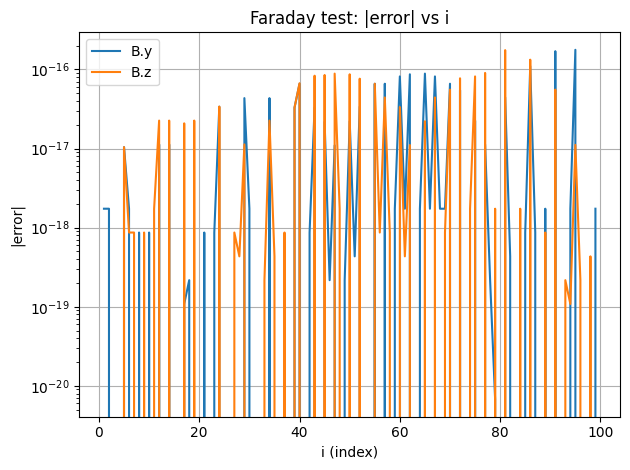

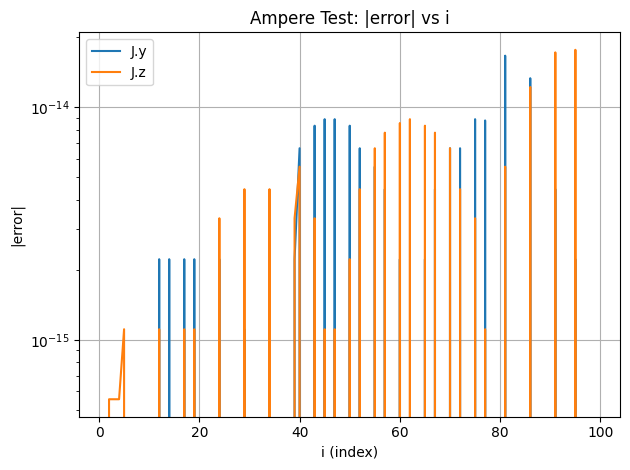

In [13]:
import re
import numpy as np
import matplotlib.pyplot as plt

pat = re.compile(
    r"i\s*=\s*(\d+)\s+([A-Za-z0-9\.\_\-]+)\s*=\s*([+\-]?\d+(?:\.\d+)?(?:[eE][+\-]?\d+)?)"
    r"\s+Expected:\s*([+\-]?\d+(?:\.\d+)?(?:[eE][+\-]?\d+)?)"
    r"\s+Error:\s*([+\-]?\d+(?:\.\d+)?(?:[eE][+\-]?\d+)?)"
)

def parse_error_lines(out):
    rows = []
    for m in pat.finditer(out):
        i   = int(m.group(1))
        nm  = m.group(2)
        err = float(m.group(5))
        rows.append((i, nm, err))
    return rows

def plot_errors(rows, title):
    names = sorted(set(nm for _, nm, _ in rows))
    plt.figure()
    for nm in names:
        rr = sorted([(i, abs(e)) for i, n, e in rows if n == nm], key=lambda t: t[0])
        ii = np.array([t[0] for t in rr])
        ee = np.array([t[1] for t in rr])
        plt.semilogy(ii, ee, label=nm)
    plt.xlabel("i (index)")
    plt.ylabel("|error|")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# usage:
rows = parse_error_lines(out_far)
plot_errors(rows, "Faraday test: |error| vs i")
rows1= parse_error_lines(out_amp)
plot_errors(rows1, "Ampere Test: |error| vs i")

Density:
n[0] = 0
n[1] = 0
n[2] = 0
n[3] = 0
n[4] = 0
n[5] = 1
n[6] = 1
n[7] = 0
n[8] = 0
n[9] = 0
n[10] = 0
n[11] = 0
n[12] = 0

Flux (Vx):
Vx[0] = 0
Vx[1] = 0
Vx[2] = 0
Vx[3] = 0
Vx[4] = 0
Vx[5] = 1
Vx[6] = 1
Vx[7] = 0
Vx[8] = 0
Vx[9] = 0
Vx[10] = 0
Vx[11] = 0
Vx[12] = 0

Total Density N:
N[0] = 0
N[1] = 0
N[2] = 0
N[3] = 0
N[4] = 0
N[5] = 1
N[6] = 1
N[7] = 0
N[8] = 0
N[9] = 0
N[10] = 0
N[11] = 0
N[12] = 0

Bulk Velocity Vx:
Vx[0] = 0
Vx[1] = 0
Vx[2] = 0
Vx[3] = 0
Vx[4] = 0
Vx[5] = 1
Vx[6] = 1
Vx[7] = 0
Vx[8] = 0
Vx[9] = 0
Vx[10] = 0
Vx[11] = 0
Vx[12] = 0



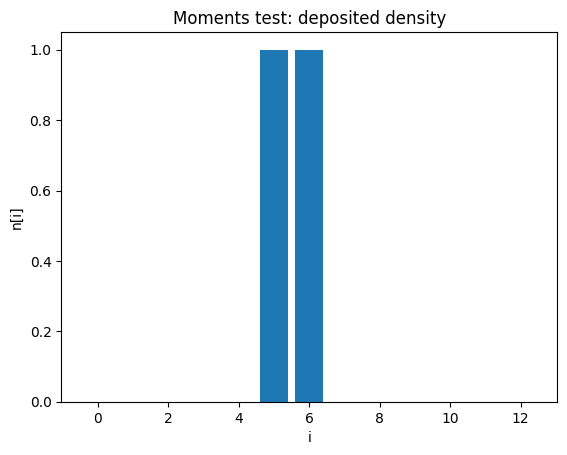

In [14]:
def parse_array_block(out, name):
    # matches lines like: n[6] = 1
    p = re.compile(rf"^{re.escape(name)}\[(\d+)\]\s*=\s*([+\-]?\d+(?:\.\d+)?(?:[eE][+\-]?\d+)?)\s*$",
                   re.MULTILINE)
    items = [(int(i), float(v)) for i, v in p.findall(out)]
    if not items:
        return None
    items.sort()
    idx = np.array([i for i,_ in items], dtype=int)
    val = np.array([v for _,v in items], dtype=float)
    return idx, val

out_mom = run("./build/tests/moments/test-moments")

idx_n, n  = parse_array_block(out_mom, "n")
idx_vx, vx = parse_array_block(out_mom, "Vx")

plt.figure()
plt.bar(idx_n, n)
plt.xlabel("i")
plt.ylabel("n[i]")
plt.title("Moments test: deposited density")
plt.show()


In [16]:
out_pop = run("./build/tests/population/test_population")


Testing Population::deposit() with a single deterministic particle...
PASS.
  particle x=1.06 (frac=0.3), W=2, vx=0.5
  density nodes: i=6 -> 1.4 , i=7 -> 0.6
  flux-x nodes:  i=6 -> 0.7 , i=7 -> 0.3



## Numerical Validation Summary

### Faraday Operator Test
The Faraday test verifies the discrete curl operator used to advance the magnetic field.
The numerical update is compared against the analytic expectation, and the pointwise error
\(|\Delta B|\) is plotted as a function of grid index.

The observed errors are of order \(10^{-18}–10^{-16}\), consistent with floating-point
round-off. No systematic bias or spatial structure is visible, confirming that the Faraday
implementation is correct.

---

### Ampere Operator Test
The Ampere test checks the computation of the current-induced magnetic field response.
The numerical current components (\(J_y, J_z\)) are compared to their analytical values.

The error remains at machine precision (\(\sim 10^{-15}\)) across the domain, indicating that
the discrete Ampère operator and staggering are implemented correctly.

---

### Moments (Density and Flux) Test
This test validates the particle-to-grid moment deposition.
A deterministic particle configuration is used so that the expected deposited density
and flux can be computed analytically.

The resulting density \(n(i)\), flux \(V_x(i)\), total density \(N(i)\), and bulk velocity
\(V_x(i)\) match the expected values exactly at the affected grid points, confirming
correct weighting and conservation properties.

---

### Population::deposit() Test
The population test validates the linear (CIC) deposition scheme implemented in
`Population::deposit()`.

A single particle with known position, weight, and velocity is deposited onto the grid.
The deposited density and flux are split between neighboring nodes according to the
analytic linear weights. The numerical output matches the analytic expectation exactly,
confirming correctness of the deposit implementation.

---

### Conclusion
All core numerical operators (Faraday, Ampère, moments, and particle deposition) exhibit
errors consistent with machine precision or exact agreement with analytic results.
This confirms the correctness of the discretization and implementation used in the hybrid solver.
